## Financial timeseries data

In finance, it is common to be working with a CSV (comma-seperate-value) "flat" file of a timeseries of many different assets with their prices, returns, or other data over time. Sometimes the data is stored in databases, but more often than not, even large banks still use spreadsheets.

In this exercise, you have been given a timeseries of trading data for Microsoft stock as a .csv file stored at the url fpath_csv. When you finish the exercise, take note of the various types of data stored in each column.

You will be using pandas to read in the CSV data as a DataFrame.

In [6]:
# Import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

# Read in the csv file and parse dates
StockPrices = pd.read_csv('microsoft.csv', parse_dates=['Date'])

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Print only the first five rows of StockPrices
print(StockPrices[0:5])

        Date    Open    High     Low     Close    Volume   Adjusted
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828


## Calculating financial returns

The file you loaded in the previous exercise included daily Open, High, Low, Close, Adjusted Close, and Volume data, often referred to as OHLCV data.

The Adjusted Close column is the most important. It is normalized for stock splits, dividends, and other corporate actions, and is a true reflection of the return of the stock over time. You will be using the adjusted close price to calculate the returns of the stock in this exercise.

StockPrices from the previous exercise is available in your workspace, and matplotlib.pyplot is imported as plt.

        Date    Open    High     Low     Close    Volume   Adjusted   Returns
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


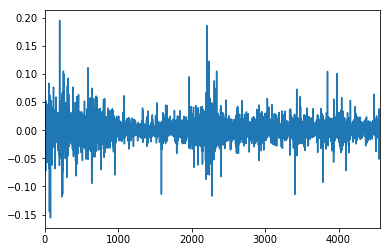

In [7]:
# Calculate the daily returns of the adjusted close price
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Check the first five rows of StockPrices
print(StockPrices.head())

# Plot the returns column over time
StockPrices['Returns'].plot()
plt.show()

## Return distributions

In order to analyze the probability of outliers in returns, it is helpful to visualize the historical returns of a stock using a histogram.

You can use the histogram to show the historical density or frequency of a given range of returns. Note the outliers on the left tail of the return distribution are what you often want to avoid, as they represent large negative daily returns. Outliers on the right hand side of the distribution are normally particularly good events for the stock such as a positive earnings surprise.

StockPrices from the previous exercise is available in your workspace, and matplotlib.pyplot is imported as plt.

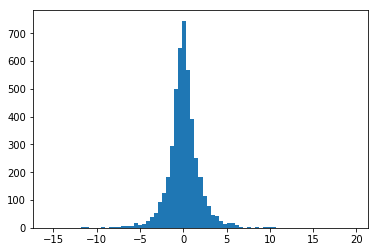

In [8]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins=75, density=False)
plt.show()

## First moment: Mu

You can calculate the average historical return of a stock by using numpy's mean() function.

When you are calculating the average daily return of a stock, you are essentially estimating the first moment ( μ ) of the historical returns distribution.

But what use are daily return estimates to a long-term investor? You can use the formula below to estimate the average annual return of a stock given the average daily return and the number of trading days in a year (typically there are roughly 252 trading days in a year):

Average Annualized Return=((1+μ)252)−1
The StockPrices object from the previous exercise is stored as a variable.

In [9]:
# Import numpy as np
import numpy as np

# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print(mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.0003777754643575774
0.09985839482858783


## Second moment: Variance

Just like you estimated the first moment of the returns distribution in the last exercise, you can can also estimate the second moment, or variance of a return distribution using numpy.

In this case, you will first need to calculate the daily standard deviation ( σ ), or volatility of the returns using np.std(). The variance is simply σ2.

StockPrices from the previous exercise is available in your workspace, and numpy is imported as np.

In [10]:
# Calculate the standard deviation of daily return of the stock
sigma_daily = np.std(StockPrices['Returns'])
print(sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print(variance_daily)

0.019341100408708317
0.00037407816501973704


Annualizing variance

You can't annualize the variance in the same way that you annualized the mean.

In this case, you will need to multiply σ by the square root of the number of trading days in a year. There are typically 252 trading days in a calendar year. Let's assume this is the case for this exercise.

This will get you the annualized volatility, but to get annualized variance, you'll need to square the annualized volatility just like you did for the daily calculation.

sigma_daily from the previous exercise is available in your workspace, and numpy is imported as np.

In [12]:
# Annualize the standard deviation
sigma_annualized = sigma_daily * np.sqrt(252)
print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.3070304505826315
0.09426769758497373
